In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import datetime
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 32})
sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
plt.rcParams['figure.figsize'] = 15, 12

pd.options.display.max_columns = 999
pd.options.display.max_rows = 100


from datetime import datetime
str(datetime.now())



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


'2018-01-07 18:20:23.848982'

In [2]:
# df_2 = data.read_data('Vansjo/VAN2_data_2017_02_28_11_21.xlsx')
df = data.read_data('Vansjo/VAN1_data_2017_02_28_10_55.xlsx')

/Users/imarkelo/git/MyLake_v2_Vansjo/Postproc_code/data.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


In [3]:
plotter = ResultsPlotter(f='../IO/niva_pH_8_RMSD_chl.mat')

### Phosphorus

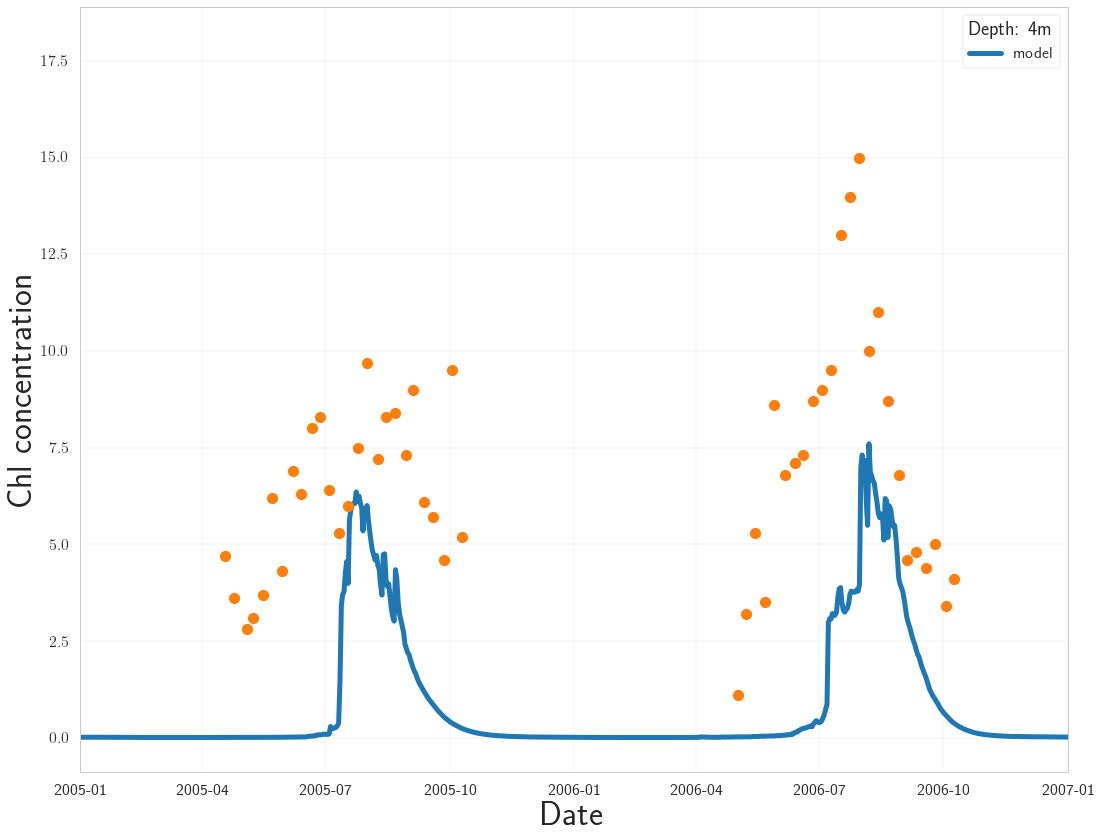

In [6]:
ax = plotter.plot_fit_wc(['Chl'], depth=4, dstart='2005-01-01', dend='2007-01-01', factor=1)
data.plot_depth(df, 'KlfA', depth=0, ax=ax)

In [ ]:
ax = plotter.plot_fit_wc(['P'], depth=4, dstart='2005-01-01', dend='2011-01-01', factor=1)
data.plot_depth(df, 'PO4-P', depth=0, ax=ax)

In [ ]:
ax = plotter.plot_fit_wc(['P', 'PP', 'DOP', 'POP'], depth=4, dstart='2005-01-01', dend='2013-01-01', factor=1)
data.plot_depth(df_2, 'TOTP', depth=0, ax=ax)

In [ ]:
ax = plotter.plot_fit_wc(['POP'], depth=4, dstart='2005-01-01', dend='2013-01-01', factor=1)
data.plot_depth(df, 'POP', depth=0, ax=ax)

### Oxygen

In [ ]:
value = 'O2'
d = 'Depth2'
df[df.Depth1 == df.Depth1][[d, value]].groupby(d).count()

In [ ]:
for d in [0,5,10,15,20,25, 30, 35, 40]:
    f, ax = plt.subplots()
    ax = plotter.oxygen_fit_wc(depth=d, ax=ax)
    ax = data.plot_depth(df[df.Depth1 == df.Depth1], 'O2', depth=d, ax=ax)

### NItrate

In [ ]:
ax = plotter.plot_fit_wc(['NO3'], depth=0, dstart='2005-01-01', dend='2015-01-01', factor=14/62)
data.plot_depth(df, 'NO3-N', depth=0, ax=ax)

### Temperature

In [ ]:
value = 'Temperatur'
df[['Depth1', value]].groupby('Depth1').count()

In [ ]:
for d in [0,5,10,15,20,25, 30, 35, 40]:
    f, ax = plt.subplots()
    ax = plotter.plot_fit_wc(['T'], depth=d, ax=ax, dstart='2005-01-01', dend='2013-12-31')
    ax = data.plot_depth(df, 'Temperatur', depth=d, ax=ax)

In [ ]:
dstart = '2006-07-1'
dend = '2006-09-1'
d = 5
value = 'Temperatur'
df[(df.Depth1==d) & (np.isfinite(df[value])) & (df['SampleDate'] > datetime.strptime(dstart, '%Y-%m-%d')) & (df['SampleDate'] < datetime.strptime(dend, '%Y-%m-%d'))][['SampleDate', value]]

In [ ]:
df

In [ ]:
value = 'TOTN'
df[['Depth1', value]].groupby('Depth1').count()

In [ ]:
df.columns